[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CGnal/agos-ai-course/blob/master/2_2_mlp.ipynb)

# Install tensorflow

In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [1]:
!pip install tensorflow-gpu==2.6.2

     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 5.6 MB 23.9 MB/s 
     |████████████████████████████████| 462 kB 61.1 MB/s 
     |████████████████████████████████| 1.3 MB 40.7 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=1850f48f5fde5c764ce010635c422b7781c53d1e73864bc0b5f77f17ba0ae95b
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68714 sha256=e49bb9c51cda5a4e2159427657be5c7a511a9c8fdb242c454ec5a5056a80958f
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import numpy as np 

In [2]:
tf.__version__

'2.6.2'

In [3]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

'2.6.0'

In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Multi-Layer Fully Connected Networks

1. Simply a stack of fully connected layers. 
2. Each fully connected layer is also called a Dense layer and is composed of multiple perceptron units.
3. Each node in the image below is a perceptron


![picture](https://drive.google.com/uc?id=1Eyg4RhUnkaEMsX-eTs6c2REZDPH-4tGS)


## Create a simple feed forward neural network

In [5]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu", name="layer1", input_shape=(10, 3)),
        layers.Dense(2, name="layer2"),
    ]
)

2021-11-18 19:15:37.995668: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


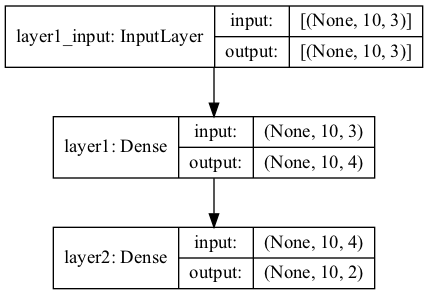

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10, 4)             16        
_________________________________________________________________
layer2 (Dense)               (None, 10, 2)             10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.02725053, -0.28724456,  0.69863164, -0.16078568],
        [-0.5783923 ,  0.73639345,  0.05808538, -0.17938393],
        [ 0.0335359 ,  0.09730136, -0.44111976,  0.57144964]],
       dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'layer2/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.8627088 , -0.4286995 ],
        [ 0.3064885 ,  0.8743613 ],
        [ 0.10619736,  0.5681577 ],
        [-0.8773055 ,  0.6026449 ]], dtype=float32)>,
 <tf.Variable 'layer2/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [9]:
# Call model on a test input
x = tf.random.uniform((10, 3)) #10 samples 3 features 
y = model(x)

In [10]:
x

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.9371517 , 0.5403702 , 0.8948555 ],
       [0.9236103 , 0.8185394 , 0.05560625],
       [0.8715483 , 0.45246184, 0.26242173],
       [0.11844921, 0.03884006, 0.4977759 ],
       [0.7354622 , 0.45489013, 0.45862317],
       [0.03829765, 0.45372593, 0.8197856 ],
       [0.94701636, 0.90556157, 0.71497154],
       [0.6792754 , 0.5011544 , 0.2129271 ],
       [0.75536335, 0.77173805, 0.67502344],
       [0.33537996, 0.13745892, 0.7490634 ]], dtype=float32)>

In [11]:
y

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.1343053 ,  0.5131844 ],
       [ 0.17605695,  0.67948526],
       [ 0.08837643,  0.38986874],
       [-0.21354963,  0.19335653],
       [ 0.03289014,  0.37669468],
       [-0.21070087,  0.58182603],
       [ 0.10234101,  0.6892078 ],
       [ 0.10317101,  0.4029923 ],
       [ 0.04657825,  0.59658074],
       [-0.28275535,  0.2786076 ]], dtype=float32)>

## keras.Sequential and model object
* `model`: model is core data structure of keras. It holds the stack of layers created for the model. 

* `keras.Sequential`: creates model object. Provides functions to fit the model and do predict on the model.


# Sample problem : Fashion Mnist

Train a neural network model to classify images of clothing, like sneakers and shirts.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:



In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Image shape : 60,000 x 28 x 28

Each image is represented as a 2 dimensional matrix of 28 x 28

In [15]:
train_images.shape,len(train_labels)


((60000, 28, 28), 60000)

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

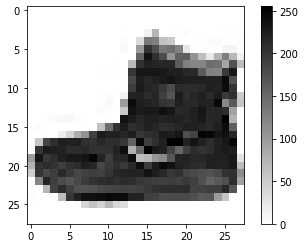

In [18]:
plt.imshow(train_images[0], plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## Preprocess images
Normalize pixel values in the range [0, 1], i.e. divide by 255.

In [19]:
# important to perform each processing step separately on train and test 

train_images = train_images / 255.0

test_images = test_images / 255.0

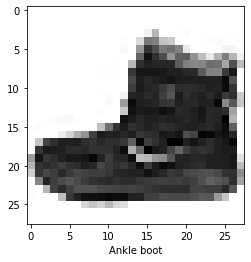

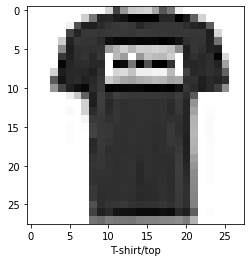

In [20]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.show()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.show()


## Build the model and pipeline using Sequential API

## Setup layers

Flatten -> Dense(128) -> Dense(10) 

Flatten : flatten images i.e. convert 28,28 to 28*28=784 vector

Dense(250): Hidden layer with 250 units

Dense(10): Dense layer with 10 outputs each corresponding to our class label

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

Compiling the model means setting up the optimizer and loss function

* **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
* **Metrics** —Used to monitor the training and testing steps. This example uses accuracy, the fraction of the images that are correctly classified.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               196250    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


Categorical cross entropy : Use when class labels are one hot encoded

Sparse categorical cross entropy : Use when class labels are integers

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [23]:
# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000, shuffle=True, callbacks=[tensorboard_callback], validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 2s 26ms/step - loss: 0.8470 - accuracy: 0.7128 - val_loss: 0.5523 - val_accuracy: 0.8056
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 0.5026 - accuracy: 0.8298 - val_loss: 0.4683 - val_accuracy: 0.8370
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4493 - accuracy: 0.8464 - val_loss: 0.4404 - val_accuracy: 0.8470
Epoch 4/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4185 - accuracy: 0.8576 - val_loss: 0.4243 - val_accuracy: 0.8535
Epoch 5/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3954 - accuracy: 0.8642 - val_loss: 0.4001 - val_accuracy: 0.8621
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 0.3779 - accuracy: 0.8699 - val_loss: 0.3876 - val_accuracy: 0.8650
Epoch 7/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3673 - accuracy: 0.8716 - val_loss: 0.3817 - val_accuracy: 0.8683
Epoch 

## Evaluate the model on test set

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3907 - accuracy: 0.8907

Test accuracy: 0.8906999826431274


## Visual check

Correct labels : blue 

Incorrect labels : red

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

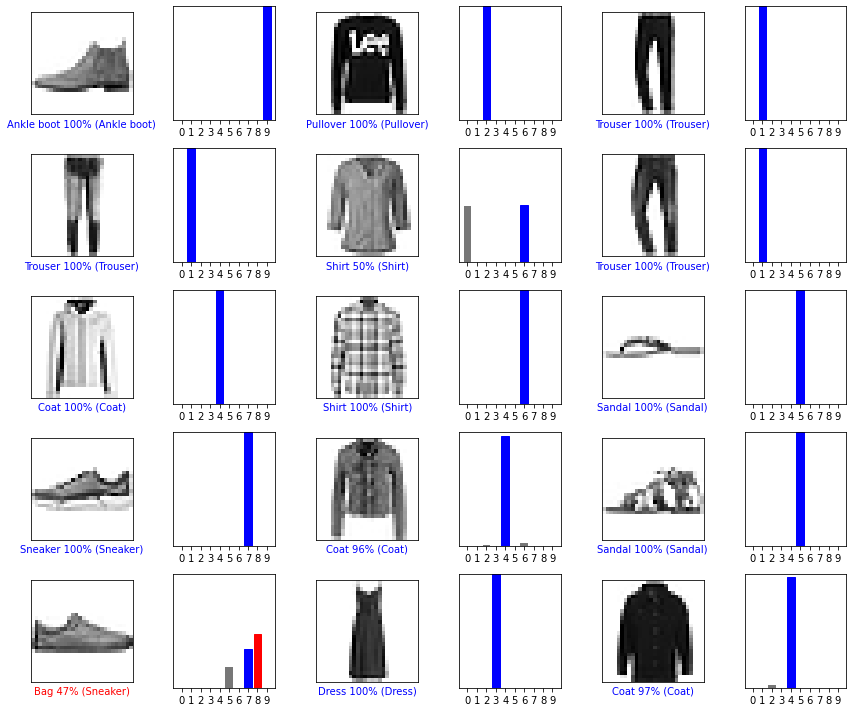

In [26]:
predictions = model.predict(test_images)
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Overfitting? 

As a neural network gets deeper the tendency to overfit increases. How to debug if our model is overfitting? 


Does the validation loss rise after some epochs? And if validation loss is higher than the training loss its perfectly fine, your model is still learning. Naturally you can't have validation loss to be less than your training loss (it does become very close to your training loss if the model is deep enough ). But if validation loss rises and your training loss keeps decreasing then you are overfitting. Use early stopping to tackle overfitting.

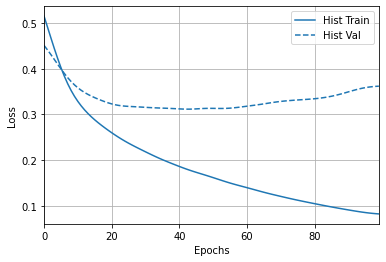

In [27]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

### Early stopping

Stop training when validation loss does not improve any longer.

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)



history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 2s 26ms/step - loss: 0.8204 - accuracy: 0.7243 - val_loss: 0.5357 - val_accuracy: 0.8184
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4944 - accuracy: 0.8324 - val_loss: 0.4724 - val_accuracy: 0.8353
Epoch 3/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4443 - accuracy: 0.8470 - val_loss: 0.4332 - val_accuracy: 0.8503
Epoch 4/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4149 - accuracy: 0.8571 - val_loss: 0.4173 - val_accuracy: 0.8553
Epoch 5/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3921 - accuracy: 0.8637 - val_loss: 0.4005 - val_accuracy: 0.8592
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 0.3788 - accuracy: 0.8688 - val_loss: 0.3901 - val_accuracy: 0.8668
Epoch 7/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3576 - accuracy: 0.8750 - val_loss: 0.3745 - val_accuracy: 0.8695
Epoch 

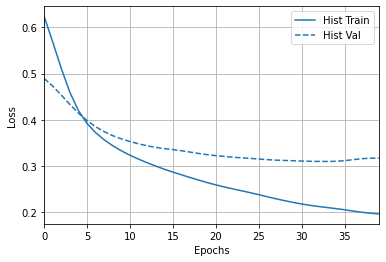

In [29]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3327 - accuracy: 0.8852

Test accuracy: 0.885200023651123


### Dropout

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)



history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 2s 29ms/step - loss: 0.8706 - accuracy: 0.6995 - val_loss: 0.5498 - val_accuracy: 0.8110
Epoch 2/100
48/48 [==============================] - 1s 24ms/step - loss: 0.5430 - accuracy: 0.8149 - val_loss: 0.4698 - val_accuracy: 0.8401
Epoch 3/100
48/48 [==============================] - 1s 24ms/step - loss: 0.4760 - accuracy: 0.8372 - val_loss: 0.4375 - val_accuracy: 0.8477
Epoch 4/100
48/48 [==============================] - 1s 24ms/step - loss: 0.4379 - accuracy: 0.8493 - val_loss: 0.4102 - val_accuracy: 0.8579
Epoch 5/100
48/48 [==============================] - 1s 24ms/step - loss: 0.4153 - accuracy: 0.8560 - val_loss: 0.3973 - val_accuracy: 0.8597
Epoch 6/100
48/48 [==============================] - 1s 25ms/step - loss: 0.3933 - accuracy: 0.8631 - val_loss: 0.3806 - val_accuracy: 0.8672
Epoch 7/100
48/48 [==============================] - 1s 25ms/step - loss: 0.3768 - accuracy: 0.8675 - val_loss: 0.3713 - val_accuracy: 0.8684
Epoch 

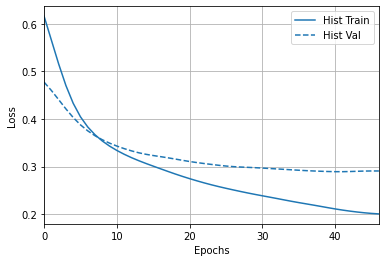

In [32]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})